In [40]:
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [41]:
load_dotenv()

True

In [42]:
model=ChatGroq(model="llama-3.1-8b-instant")

In [43]:
class LLM(TypedDict):
    question:str
    answer:str

In [44]:
def llm_qna(state:LLM)->LLM:
    question=state['question']
    prompt=f'Provide a answer for the following {question}'
    result=model.invoke(prompt).content
    state['answer']=result

    return state


In [45]:
graph=StateGraph(LLM)

In [46]:
# Add nodes:
graph.add_node('llm_qna',llm_qna)

# Add edge:
graph.add_edge(START,'llm_qna')
graph.add_edge('llm_qna',END)

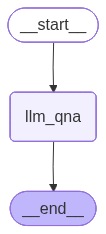

In [47]:
workflow=graph.compile()
workflow

In [48]:
initial_state={'question':'Tell me something about ashes cricket?'}
final_state=workflow.invoke(initial_state)

print(final_state['answer'])

Ashes cricket is a Test cricket series contested between Australia and England. The series is one of the most iconic and historic rivalries in the world of cricket. 

Here are some interesting facts about Ashes cricket:

1. **Origin**: The series is named after a mocking editorial in The Sporting Times newspaper in 1882, following England's loss to Australia in a Test match. The editorial stated that English cricket had died and would be "buried" and sent to Australia as a last message to the English cricket team.

2. **Historical significance**: The first Ashes series was played in 1882-83, and it has been a regular feature of international cricket ever since. The series is contested biennially, with each team hosting the other for a series of Test matches.

3. **The Ashes urn**: The winning team is awarded the Ashes urn, which is a small container that supposedly holds the ashes of English cricket. The urn is kept at the Marylebone Cricket Club Museum at Lord's Cricket Ground in Lond